In [1]:
"""
Created on Wed Mar  9 15:28:50 2022

@author: Shu-wei Huang
"""
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_points(plt, points, style):
    pts=points.reshape(-1,2)
    plt.plot(pts[:,0],pts[:,1],style)



-------------Shape Modelling Tasks-------------------------
Number of shapes 596
Number of points 12


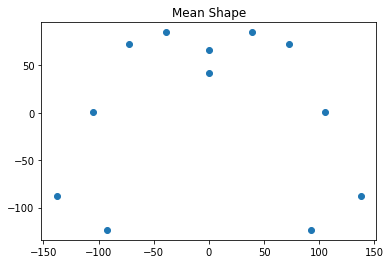

In [2]:
print("-------------Shape Modelling Tasks-------------------------")
  
shapes=np.genfromtxt("pelvis_shapes(2).txt")

n_shapes=int(shapes.shape[0])
print("Number of shapes", n_shapes)
n_pts=int(shapes.shape[1]/2)
print("Number of points", n_pts)


# Calculate the mean shape by averaging over the first dimension
mean_shape=shapes.mean(0)

plot_points(plt,mean_shape,"o")
plt.title("Mean Shape")
plt.show()


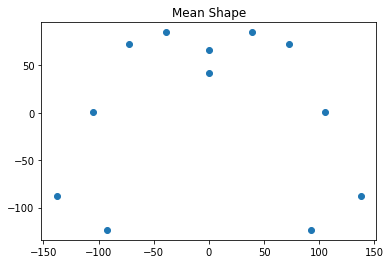

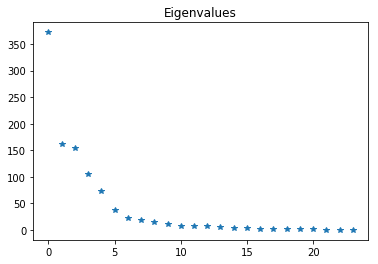

P has shape (24, 3)


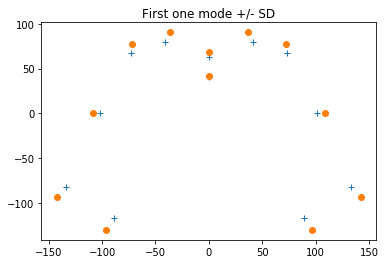

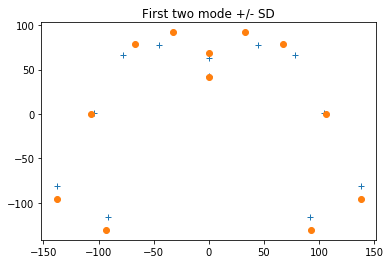

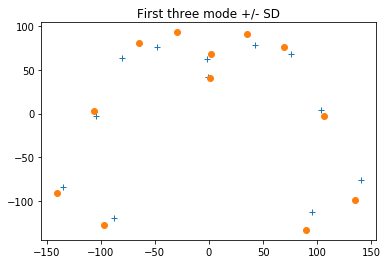

In [6]:
# Calculate the mean shape by averaging over the first dimension
mean_shape=shapes.mean(0)

plot_points(plt,mean_shape,"o")
plt.title("Mean Shape")
plt.show()

# === Perform PCA ===
# First subtract mean from each row
D=shapes-mean_shape

# Create covariance matrix
S=D.T @ D/n_shapes

# Compute the eigenvectors and eigenvalues (arbitrary order)
evals,EVecs = np.linalg.eig(S)

# Sort by the eigenvalues (largest first)
idx = np.flip(np.argsort(evals),0)
evals = evals[idx]
EVecs = EVecs[:,idx]


# Plot the Eigenvalues against index
plt.plot(evals,"*")
plt.title("Eigenvalues")
plt.show()

# Create a model with t modes
t=3
mode_sd=np.sqrt(evals[0:t])
P=EVecs[:,0:t]

print("P has shape",P.shape)

# Plot the effect of the first one, two and three mode
# Generate shape with +/- SD
b = np.sqrt(evals)
b1=np.array([1,0,0]) * mode_sd
b2=np.array([1,1,0]) * mode_sd
b3=np.array([1,1,1]) * mode_sd

points1_1=mean_shape + P@b1
points2_1=mean_shape - P@b1

points1_2=mean_shape + P@b2
points2_2=mean_shape - P@b2

points1_3=mean_shape + P@b3
points2_3=mean_shape - P@b3

#plt.figure
#plt.subplot(311)
plot_points(plt,points1_1,"+")
plot_points(plt,points2_1,"o")
#plot_points(plt,mean_shape,"s")
plt.title("First one mode +/- SD")
plt.show()

#plt.subplot(312)
plot_points(plt,points1_2,"+")
plot_points(plt,points2_2,"o")
#plot_points(plt,mean_shape,"s")
plt.title("First two mode +/- SD")
plt.show()

#plt.subplot(313)
plot_points(plt,points1_3,"+")
plot_points(plt,points2_3,"o")
#plot_points(plt,mean_shape,"s")
plt.title("First three mode +/- SD")
plt.show()

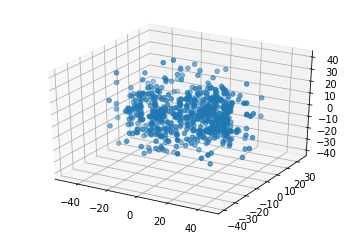

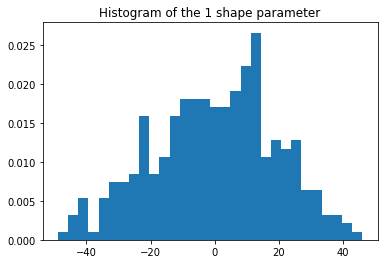

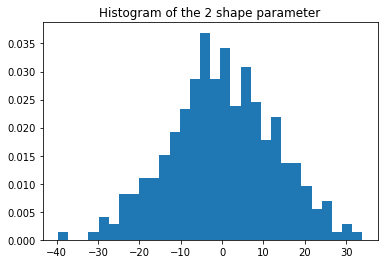

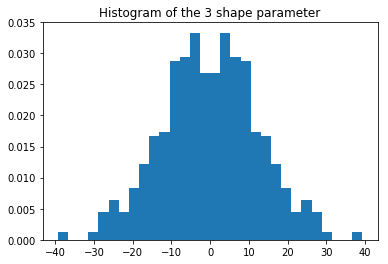

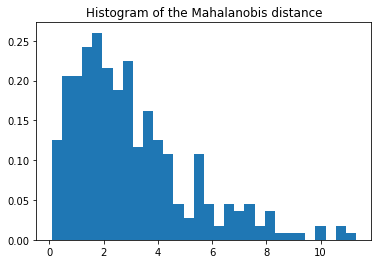

In [4]:
# Extract parameters for all shapes
B=EVecs.T@D.T
#plt.plot(B[0,:],B[1,:],"o")
#plt.title("Extract parameters for all shapes")
#plt.show()

# Show the scatter of the first three parameters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(B[0,:],B[1,:],B[2,:])
plt.show()

# Display histograms of each shape parameter (across the training set) 
for i in range(3):
    plt.hist(B[i,:], density=True, bins=30)
    title = "Histogram of the " + str(i+1)+" shape parameter" 
    plt.title(title)
    plt.show()

# Calculate the Mahalanobis distance
M = np.array([])
for i in range(596):
    m = 0
    for j in range(3):
        m = m + np.square(B[j,i])/evals[j]
    M = np.concatenate((M,[m]))

plt.figure()
plt.hist(M, density=True, bins=30)
title = "Histogram of the Mahalanobis distance" 
plt.title(title)
plt.show()


-----------------------PCA Task ------------------------------
Number of shapes 200
Number of points 5


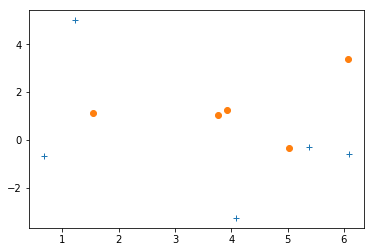

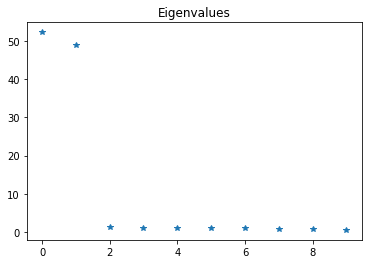

P_PCA has shape (10, 2)
The estimation of the number of dimension is  2


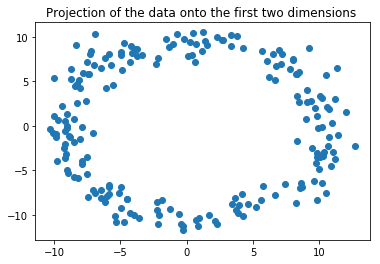

In [7]:
print("-----------------------PCA Task ------------------------------")

PCA_data=np.genfromtxt("PCA_data1.txt")

n_shapes_PCA=int(PCA_data.shape[0])
print("Number of shapes", n_shapes_PCA)
n_pts_PCA=int(PCA_data.shape[1]/2)
print("Number of points", n_pts_PCA)

# Create a scatter plot using the first two dimension.
mean_PCA_data=PCA_data.mean(0)
plot_points(plt,PCA_data[0,:],"+")
plot_points(plt,PCA_data[1,:],"o")
plt.show()

# Apply PCA and estimate the number of dimensions of the data 
D_PCA_data = PCA_data - mean_PCA_data

# Create covariance matrix
S_PCA = D_PCA_data.T @ D_PCA_data/n_shapes_PCA

# Compute the eigenvectors and eigenvalues (arbitrary order)
evals_P,EVecs_P = np.linalg.eig(S_PCA)

# Sort by the eigenvalues (largest first)
idx = np.flip(np.argsort(evals_P),0)
evals_P = evals_P[idx]
EVecs_P = EVecs_P[:,idx]

# Plot the Eigenvalues against index
plt.plot(evals_P,"*")
plt.title("Eigenvalues")
plt.show()

# Create a model with t modes
t=2
mode_sd_P=np.sqrt(evals_P[0:t])
P_PCA=EVecs_P[:,0:t]

print("P_PCA has shape",P_PCA.shape)

print("The estimation of the number of dimension is ",P_PCA.shape[1])

B_PCA = P_PCA.T@D_PCA_data.T
plt.plot(B_PCA[0,:],B_PCA[1,:],"o")
plt.title("Projection of the data onto the first two dimensions ")
plt.show()
